In [1]:
using DrWatson
@quickactivate

In [2]:
using Plots

In [3]:
using PyCall

In [4]:
@pyimport vtuIO

# RM Quasinewton LARGE

In [5]:
quasinewton_before = vtuIO.VTUIO(projectdir()*"/data/sims/RichardsFlow_2d_quasinewton_ts_104_t_2000.000000.vtu",dim=2)
quasinewton_after = vtuIO.VTUIO(projectdir()*"/data/sims/RichardsFlow_2d_quasinewton_change_ts_104_t_2000.000000.vtu",dim=2)

PyObject <vtuIO.VTUIO object at 0x7f6e0799ef40>

In [6]:
axisrange = LinRange(0,2,100)

100-element LinRange{Float64}:
 0.0,0.020202,0.040404,0.0606061,0.0808081,…,1.91919,1.93939,1.9596,1.9798,2.0

In [7]:
axis_1 = [(0,i,0) for i in axisrange];

In [8]:
quasinewton_after.getFieldnames()

9-element Array{String,1}:
 "HydraulicFlow"
 "NodalForces"
 "displacement"
 "epsilon"
 "pressure"
 "pressure_interpolated"
 "saturation"
 "sigma"
 "velocity"

In [9]:
quasinewton_before_resp = Dict()
quasinewton_after_resp = Dict()

Dict{Any,Any}()

In [10]:
for entry in quasinewton_after.getFieldnames()
    quasinewton_before_resp[entry] = quasinewton_before.getPointSetData(entry, pointsetarray=axis_1);
    quasinewton_after_resp[entry] = quasinewton_after.getPointSetData(entry, pointsetarray=axis_1);
end

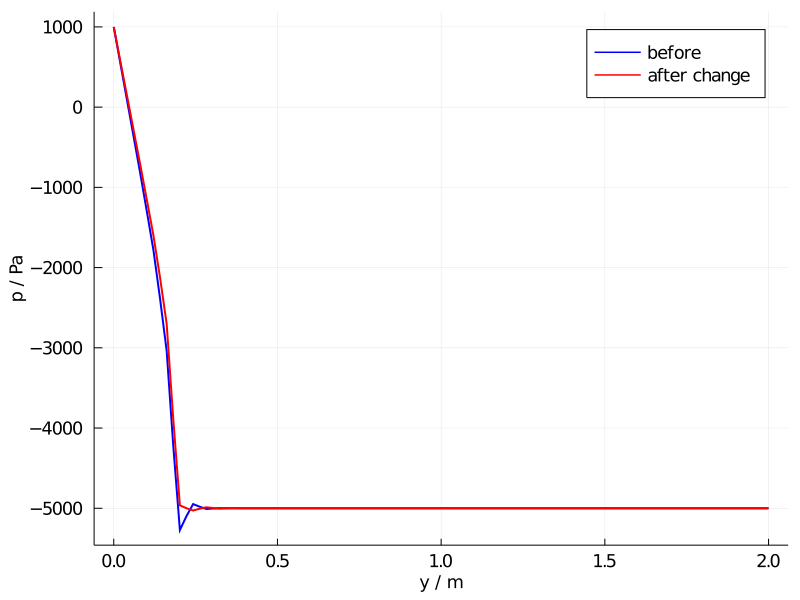

In [11]:
plot(collect(axisrange), quasinewton_before_resp["pressure_interpolated"], label="before", color=:blue, linewidth=2)
plot!(collect(axisrange), quasinewton_after_resp["pressure_interpolated"], label="after change", color=:red, linewidth=2)
xlabel!("y / m")
ylabel!("p / Pa")
plot!(size=(800,600), legend=:topright, xtickfont=font(12), ytickfont=font(12), guidefont=font(12), legendfont=font(12))

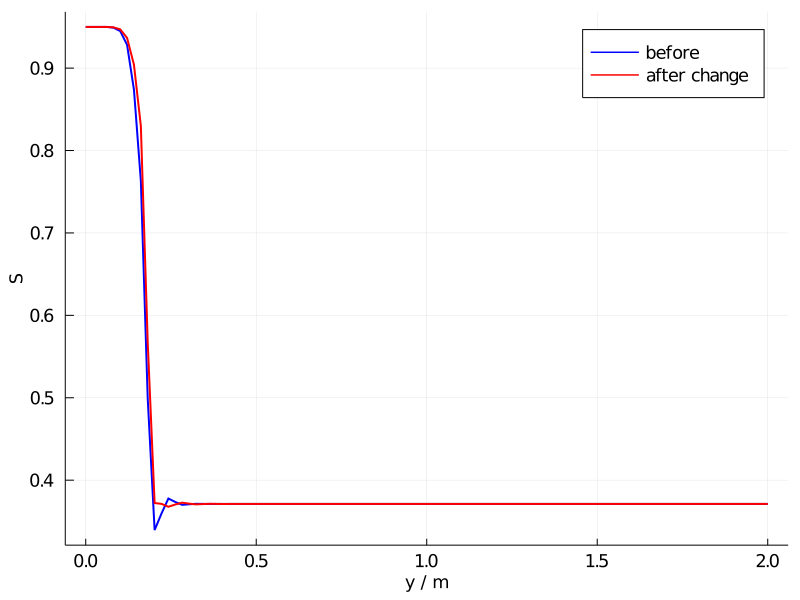

In [76]:
plot(collect(axisrange), quasinewton_before_resp["saturation"], label="before", color=:blue, linewidth=2)
plot!(collect(axisrange), quasinewton_after_resp["saturation"], label="after change", color=:red, linewidth=2)
xlabel!("y / m")
ylabel!("S")
plot!(size=(800,600), legend=:topright, xtickfont=font(12), ytickfont=font(12), guidefont=font(12), legendfont=font(12))

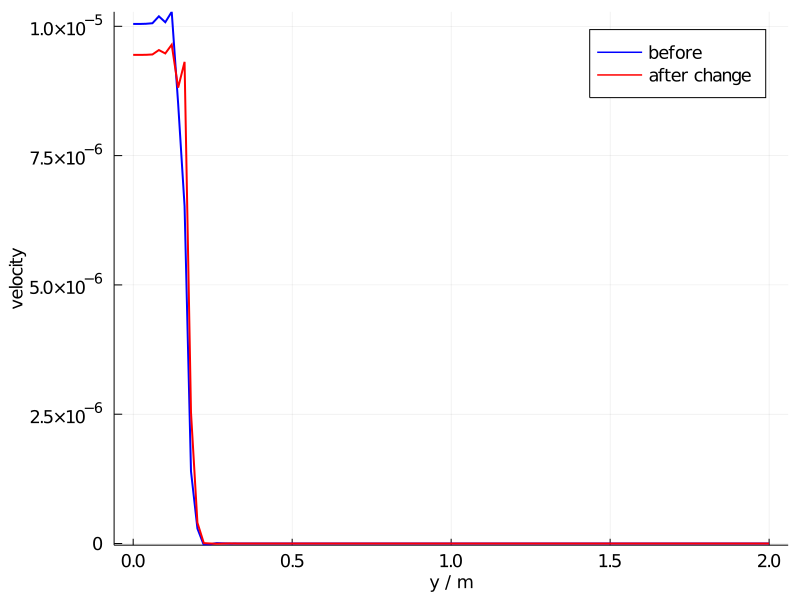

In [26]:
plot(collect(axisrange), quasinewton_before_resp["velocity"][:,2], label="before", color=:blue, linewidth=2)
plot!(collect(axisrange), quasinewton_after_resp["velocity"][:,2], label="after change", color=:red, linewidth=2)
xlabel!("y / m")
ylabel!("velocity")
ylims!(minimum(quasinewton_before_resp["velocity"][:,2]),maximum(quasinewton_before_resp["velocity"][:,2]))
plot!(size=(800,600), legend=:topright, xtickfont=font(12), ytickfont=font(12), guidefont=font(12), legendfont=font(12))

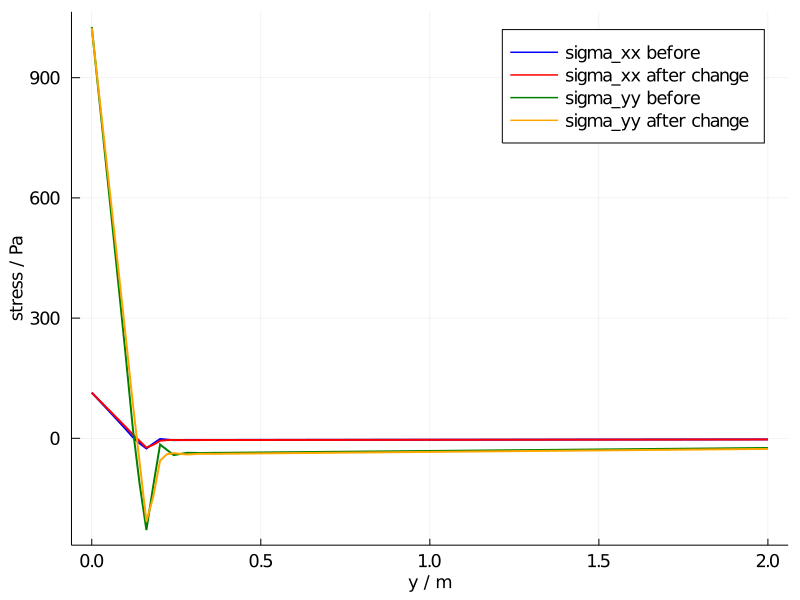

In [75]:
plot(collect(axisrange), quasinewton_before_resp["sigma"][:,1], label="sigma_xx before", color=:blue, linewidth=2)
plot!(collect(axisrange), quasinewton_after_resp["sigma"][:,1], label="sigma_xx after change", color=:red, linewidth=2)
plot!(collect(axisrange), quasinewton_before_resp["sigma"][:,2], label="sigma_yy before", color=:green, linewidth=2)
plot!(collect(axisrange), quasinewton_after_resp["sigma"][:,2], label="sigma_yy after change", color=:orange, linewidth=2)
xlabel!("y / m")
ylabel!("stress / Pa")
plot!(size=(800,600), legend=:topright, xtickfont=font(12), ytickfont=font(12), guidefont=font(12), legendfont=font(12))

# RM masslumping SMALL

In [54]:
masslumping_before = vtuIO.VTUIO(projectdir()*"/data/sims/RichardsFlow_2d_small_masslumping_ts_104_t_2000.000000.vtu",dim=2)
masslumping_after = vtuIO.VTUIO(projectdir()*"/data/sims/RichardsFlow_2d_small_masslumping_change_ts_104_t_2000.000000.vtu",dim=2)

PyObject <vtuIO.VTUIO object at 0x7f6dd7771e50>

In [55]:
masslumping_before_resp = Dict()
masslumping_after_resp = Dict()

Dict{Any,Any}()

In [56]:
for entry in quasinewton_after.getFieldnames()
    masslumping_before_resp[entry] = masslumping_before.getPointSetData(entry, pointsetarray=axis_1);
    masslumping_after_resp[entry] = masslumping_after.getPointSetData(entry, pointsetarray=axis_1);
end

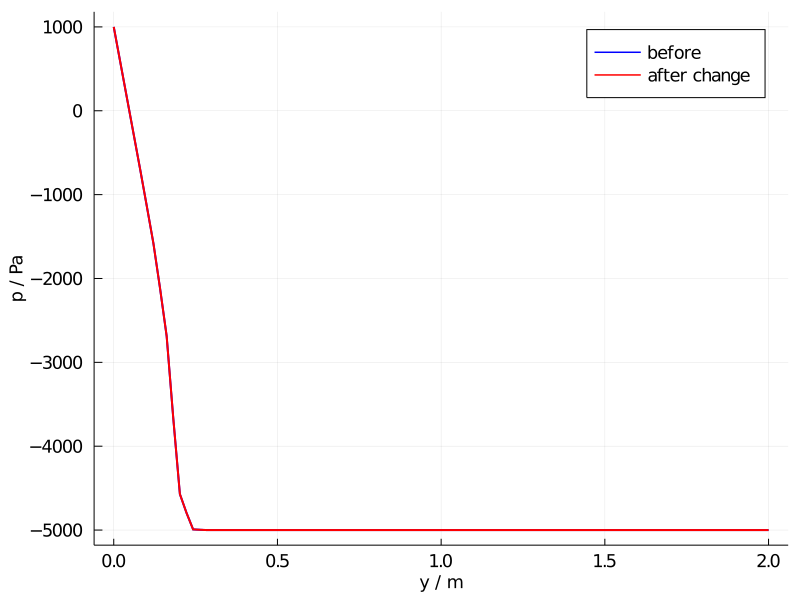

In [57]:
plot(collect(axisrange), masslumping_before_resp["pressure_interpolated"], label="before", color=:blue, linewidth=2)
plot!(collect(axisrange), masslumping_after_resp["pressure_interpolated"], label="after change", color=:red, linewidth=2)
xlabel!("y / m")
ylabel!("p / Pa")
plot!(size=(800,600), legend=:topright, xtickfont=font(12), ytickfont=font(12), guidefont=font(12), legendfont=font(12))

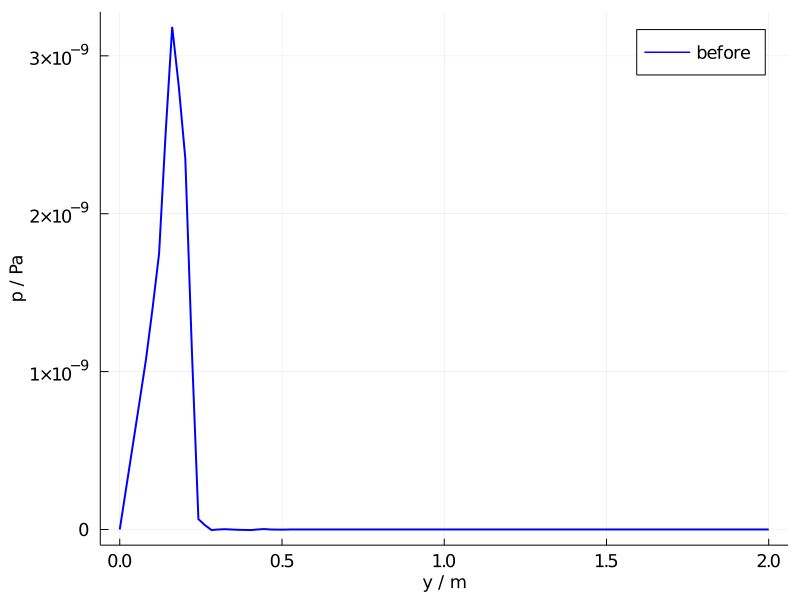

In [81]:
plot(collect(axisrange), masslumping_before_resp["pressure_interpolated"]-masslumping_after_resp["pressure_interpolated"], label="before", color=:blue, linewidth=2)
xlabel!("y / m")
ylabel!("p / Pa")
plot!(size=(800,600), legend=:topright, xtickfont=font(12), ytickfont=font(12), guidefont=font(12), legendfont=font(12))

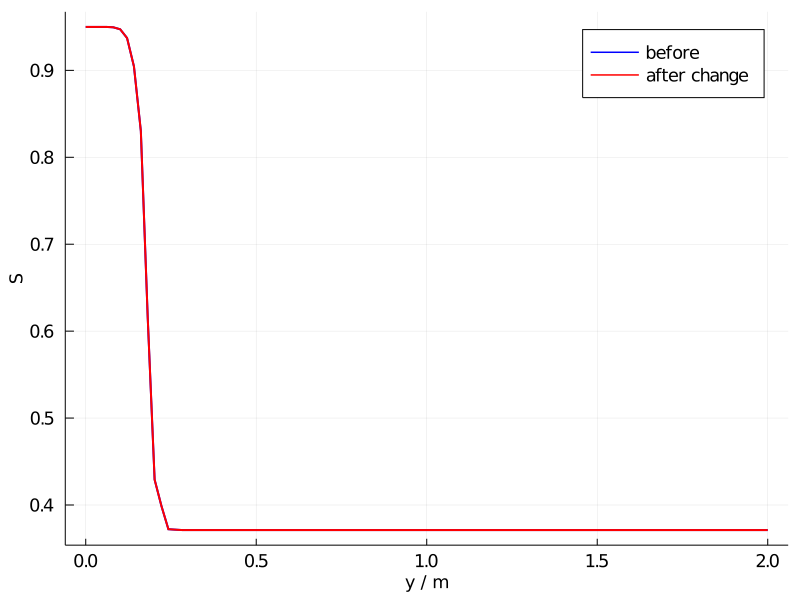

In [63]:
plot(collect(axisrange), masslumping_before_resp["saturation"], label="before", color=:blue, linewidth=2)
plot!(collect(axisrange), masslumping_after_resp["saturation"], label="after change", color=:red, linewidth=2)
xlabel!("y / m")
ylabel!("S")
plot!(size=(800,600), legend=:topright, xtickfont=font(12), ytickfont=font(12), guidefont=font(12), legendfont=font(12))

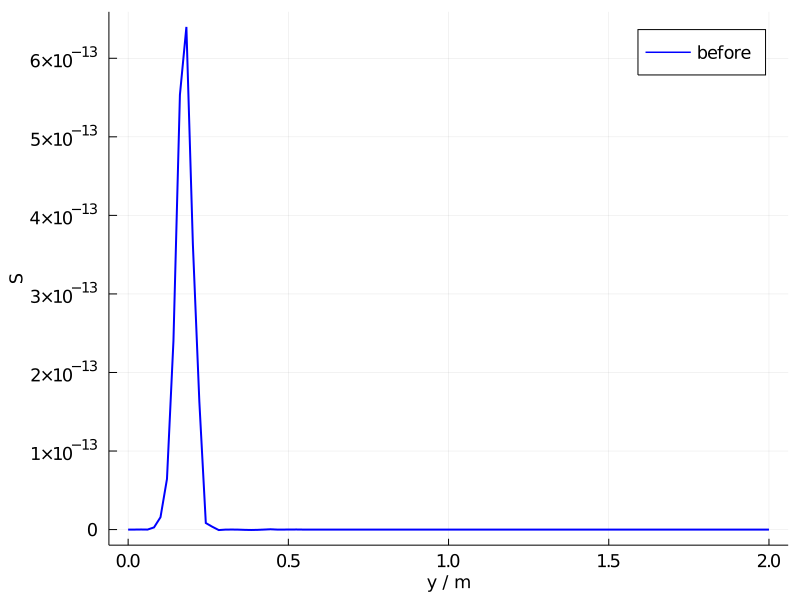

In [64]:
plot(collect(axisrange), masslumping_before_resp["saturation"]-masslumping_after_resp["saturation"], label="before", color=:blue, linewidth=2)
xlabel!("y / m")
ylabel!("S")
plot!(size=(800,600), legend=:topright, xtickfont=font(12), ytickfont=font(12), guidefont=font(12), legendfont=font(12))

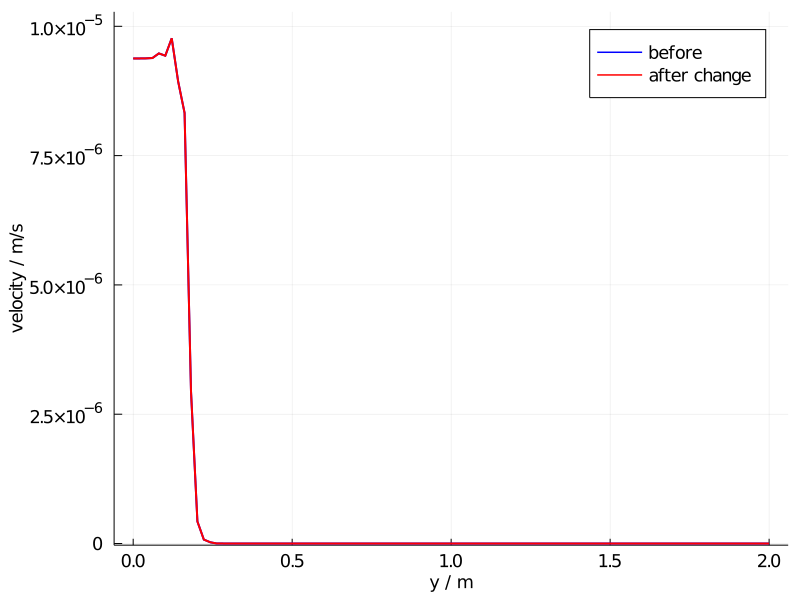

In [82]:
plot(collect(axisrange), masslumping_before_resp["velocity"][:,2], label="before", color=:blue, linewidth=2)
plot!(collect(axisrange), masslumping_after_resp["velocity"][:,2], label="after change", color=:red, linewidth=2)
xlabel!("y / m")
ylabel!("velocity / m/s")
ylims!(minimum(quasinewton_before_resp["velocity"][:,2]),maximum(quasinewton_before_resp["velocity"][:,2]))
plot!(size=(800,600), legend=:topright, xtickfont=font(12), ytickfont=font(12), guidefont=font(12), legendfont=font(12))

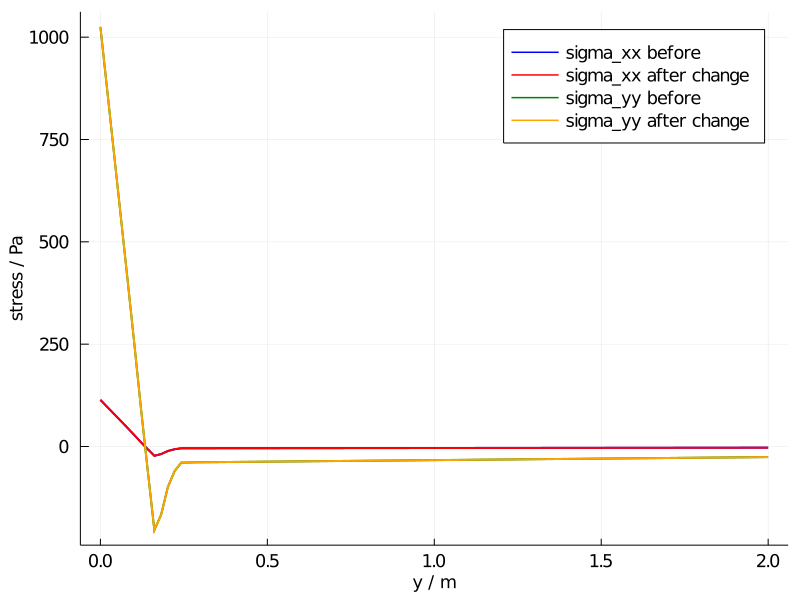

In [83]:
plot(collect(axisrange), masslumping_before_resp["sigma"][:,1], label="sigma_xx before", color=:blue, linewidth=2)
plot!(collect(axisrange), masslumping_after_resp["sigma"][:,1], label="sigma_xx after change", color=:red, linewidth=2)
plot!(collect(axisrange), masslumping_before_resp["sigma"][:,2], label="sigma_yy before", color=:green, linewidth=2)
plot!(collect(axisrange), masslumping_after_resp["sigma"][:,2], label="sigma_yy after change", color=:orange, linewidth=2)
xlabel!("y / m")
ylabel!("stress / Pa")
plot!(size=(800,600), legend=:topright, xtickfont=font(12), ytickfont=font(12), guidefont=font(12), legendfont=font(12))

# RM Liakopoulos

In [65]:
liakopoulos_before = vtuIO.VTUIO(projectdir()*"/data/sims/LiakopoulosHM/liakopoulos_t_7200.vtu",dim=2)
liakopoulos_after = vtuIO.VTUIO(projectdir()*"/data/sims/LiakopoulosHM/liakopouloschange_t_7200.vtu",dim=2)

PyObject <vtuIO.VTUIO object at 0x7f6e07d09e20>

In [66]:
liakopoulos_before_resp = Dict()
liakopoulos_after_resp = Dict()

Dict{Any,Any}()

In [67]:
for entry in quasinewton_after.getFieldnames()
    liakopoulos_before_resp[entry] = liakopoulos_before.getPointSetData(entry, pointsetarray=axis_1);
    liakopoulos_after_resp[entry] = liakopoulos_after.getPointSetData(entry, pointsetarray=axis_1);
end

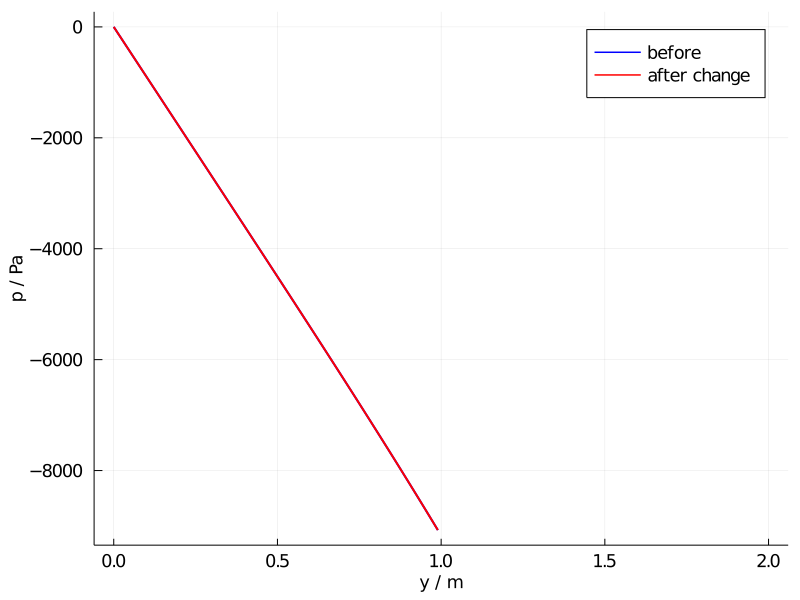

In [68]:
plot(collect(axisrange), liakopoulos_before_resp["pressure_interpolated"], label="before", color=:blue, linewidth=2)
plot!(collect(axisrange), liakopoulos_after_resp["pressure_interpolated"], label="after change", color=:red, linewidth=2)
xlabel!("y / m")
ylabel!("p / Pa")
plot!(size=(800,600), legend=:topright, xtickfont=font(12), ytickfont=font(12), guidefont=font(12), legendfont=font(12))

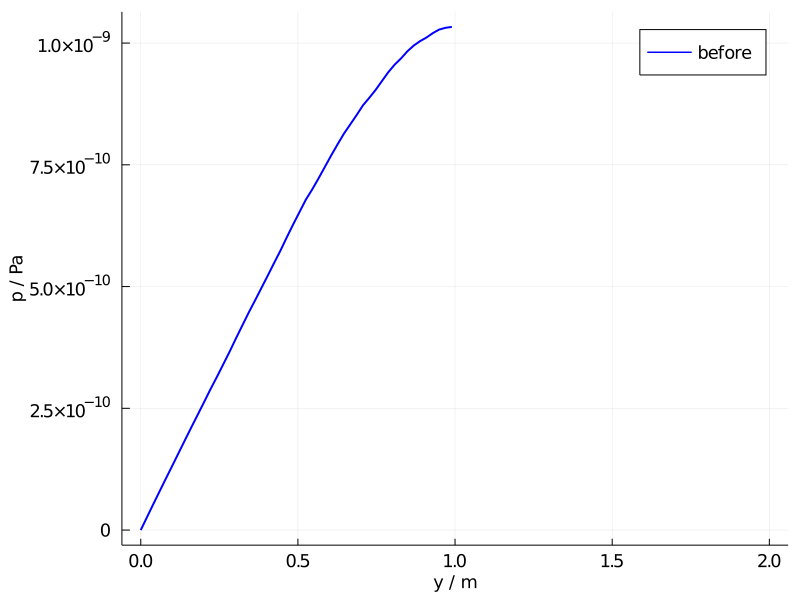

In [69]:
plot(collect(axisrange), liakopoulos_before_resp["pressure_interpolated"]-liakopoulos_after_resp["pressure_interpolated"], label="before", color=:blue, linewidth=2)
xlabel!("y / m")
ylabel!("p / Pa")
plot!(size=(800,600), legend=:topright, xtickfont=font(12), ytickfont=font(12), guidefont=font(12), legendfont=font(12))

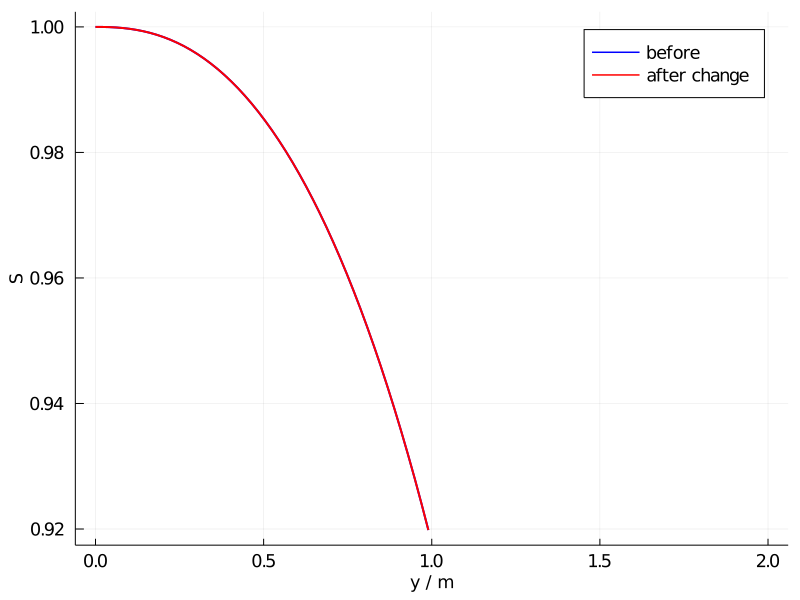

In [70]:
plot(collect(axisrange), liakopoulos_before_resp["saturation"], label="before", color=:blue, linewidth=2)
plot!(collect(axisrange), liakopoulos_after_resp["saturation"], label="after change", color=:red, linewidth=2)
xlabel!("y / m")
ylabel!("S")
plot!(size=(800,600), legend=:topright, xtickfont=font(12), ytickfont=font(12), guidefont=font(12), legendfont=font(12))

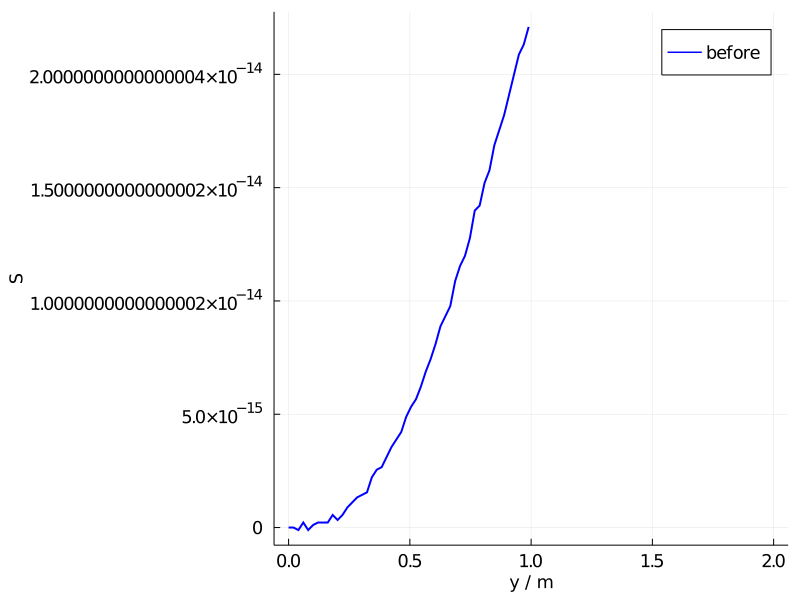

In [71]:
plot(collect(axisrange), liakopoulos_before_resp["saturation"]-liakopoulos_after_resp["saturation"], label="before", color=:blue, linewidth=2)
xlabel!("y / m")
ylabel!("S")
plot!(size=(800,600), legend=:topright, xtickfont=font(12), ytickfont=font(12), guidefont=font(12), legendfont=font(12))

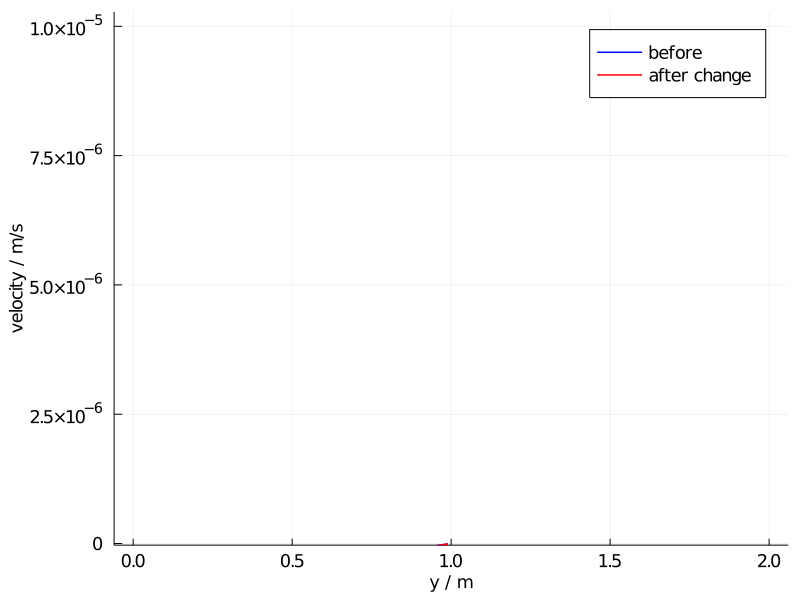

In [85]:
plot(collect(axisrange), liakopoulos_before_resp["velocity"][:,2], label="before", color=:blue, linewidth=2)
plot!(collect(axisrange), liakopoulos_after_resp["velocity"][:,2], label="after change", color=:red, linewidth=2)
xlabel!("y / m")
ylabel!("velocity / m/s")
ylims!(minimum(quasinewton_before_resp["velocity"][:,2]),maximum(quasinewton_before_resp["velocity"][:,2]))
plot!(size=(800,600), legend=:topright, xtickfont=font(12), ytickfont=font(12), guidefont=font(12), legendfont=font(12))

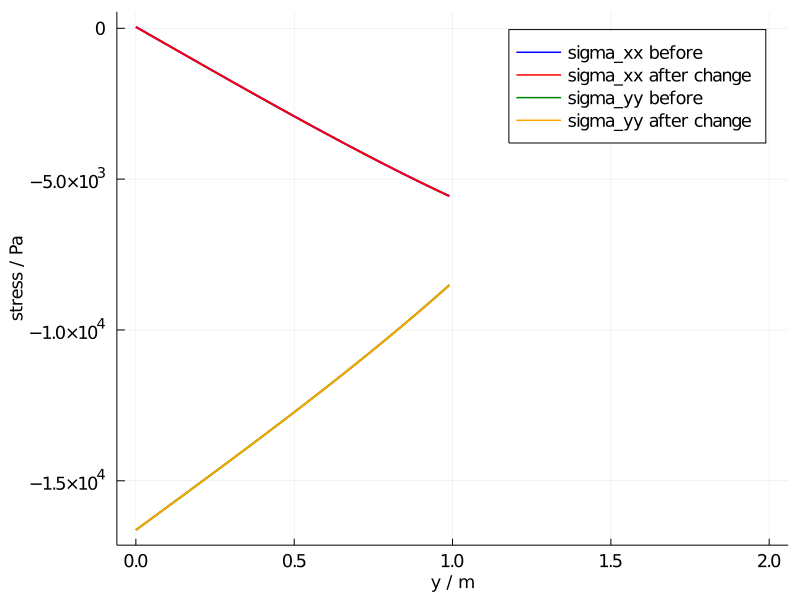

In [86]:
plot(collect(axisrange), liakopoulos_before_resp["sigma"][:,1], label="sigma_xx before", color=:blue, linewidth=2)
plot!(collect(axisrange), liakopoulos_after_resp["sigma"][:,1], label="sigma_xx after change", color=:red, linewidth=2)
plot!(collect(axisrange), liakopoulos_before_resp["sigma"][:,2], label="sigma_yy before", color=:green, linewidth=2)
plot!(collect(axisrange), liakopoulos_after_resp["sigma"][:,2], label="sigma_yy after change", color=:orange, linewidth=2)
xlabel!("y / m")
ylabel!("stress / Pa")
plot!(size=(800,600), legend=:topright, xtickfont=font(12), ytickfont=font(12), guidefont=font(12), legendfont=font(12))